# **Final Exam Score Prediction - Regression**

## **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error,  mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from google.colab import files

## **Data loading**

In [2]:
files.upload()  # Upload file kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [30]:
# Download dataset
!kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance

!unzip student-habits-vs-academic-performance.zip

Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
License(s): apache-2.0
student-habits-vs-academic-performance.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  student-habits-vs-academic-performance.zip
replace student_habits_performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: student_habits_performance.csv  


## **Data Understanding**

In [31]:
# Nama file sesuai isi zip
df = pd.read_csv("student_habits_performance.csv")

# Tampilan 5 baris pertama
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [32]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [34]:
df.duplicated().sum()

np.int64(0)

## **Filling Missing Values**

In [35]:
df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [37]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## **EDA**

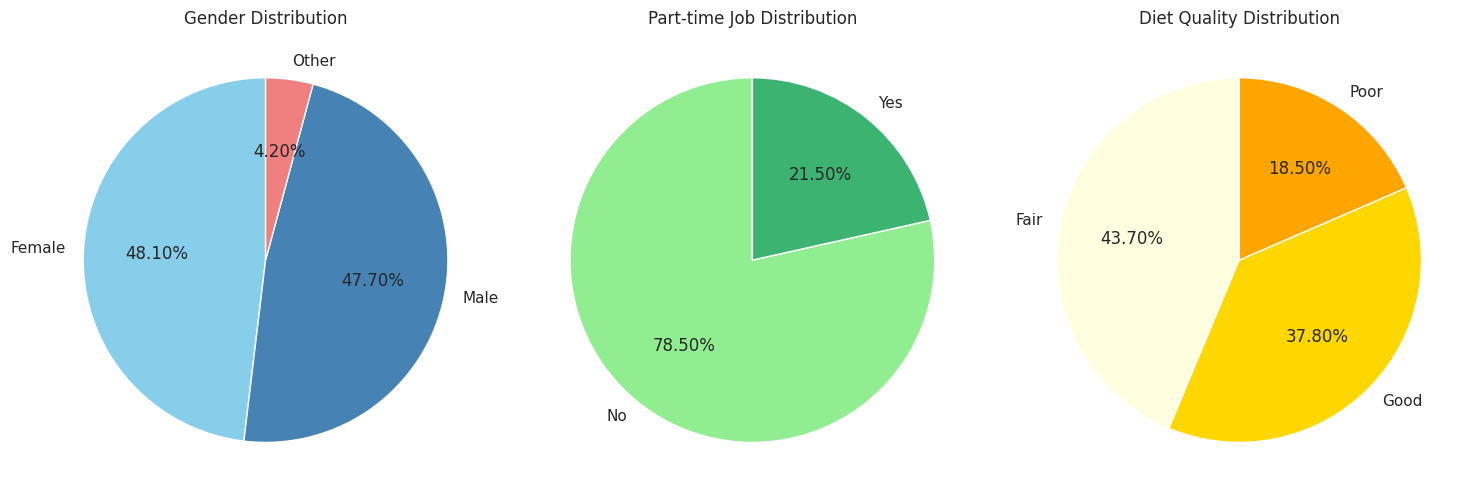

In [38]:
plt.figure(figsize=(15, 5))

# Gender Distribution
plt.subplot(1, 3, 1)
df['gender'].value_counts().plot(
    kind='pie',
    autopct="%.2f%%",
    colors=['skyblue', 'steelblue', 'lightcoral'],
    startangle=90
)
plt.title('Gender Distribution')
plt.ylabel('')  # Menghilangkan label Y

# Part-time Job Distribution
plt.subplot(1, 3, 2)
df['part_time_job'].value_counts().plot(
    kind='pie',
    autopct="%.2f%%",
    colors=['lightgreen', 'mediumseagreen', 'darkgreen'],
    startangle=90
)
plt.title('Part-time Job Distribution')
plt.ylabel('')

# Diet Quality Distribution
plt.subplot(1, 3, 3)
df['diet_quality'].value_counts().plot(
    kind='pie',
    autopct="%.2f%%",
    colors=['lightyellow', 'gold', 'orange'],
    startangle=90
)
plt.title('Diet Quality Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

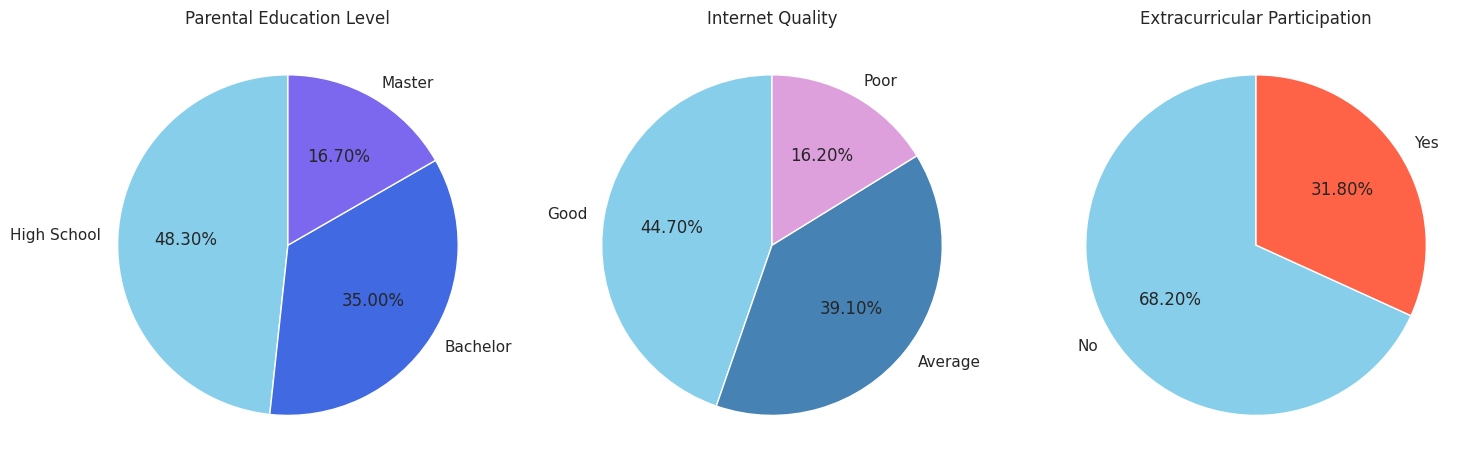

In [39]:
plt.figure(figsize=(15, 5))

# Parental Education Level Distribution
plt.subplot(1, 3, 1)
df['parental_education_level'].value_counts().plot(
    kind='pie',
    autopct="%.2f%%",
    colors=['skyblue', 'royalblue', 'mediumslateblue', 'orange'],
    startangle=90
)
plt.title('Parental Education Level')
plt.ylabel('')

# Internet Quality Distribution
plt.subplot(1, 3, 2)
df['internet_quality'].value_counts().plot(
    kind='pie',
    autopct="%.2f%%",
    colors=['skyblue', 'steelblue', 'plum'],
    startangle=90
)
plt.title('Internet Quality')
plt.ylabel('')

# Extracurricular Participation Distribution
plt.subplot(1, 3, 3)
df['extracurricular_participation'].value_counts().plot(
    kind='pie',
    autopct="%.2f%%",
    colors=['skyblue', 'tomato'],
    startangle=90
)
plt.title('Extracurricular Participation')
plt.ylabel('')

plt.tight_layout()
plt.show()

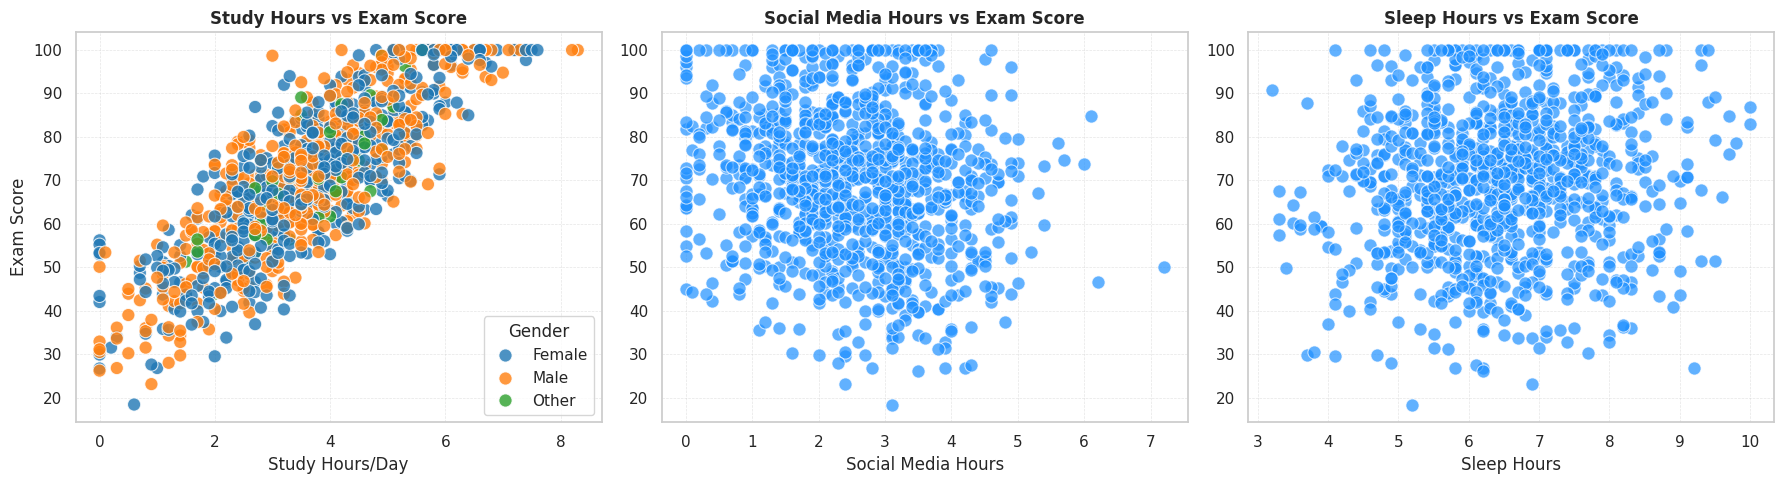

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Plot 1: Study Hours vs Exam Score
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='study_hours_per_day',
    y='exam_score',
    hue='gender',
    data=df,
    s=90,
    alpha=0.8,
    palette='tab10'
)
plt.title('Study Hours vs Exam Score', fontsize=12, fontweight='bold')
plt.xlabel('Study Hours/Day')
plt.ylabel('Exam Score')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(title='Gender', loc='lower right')

# Plot 2: Social Media Hours vs Exam Score
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='social_media_hours',
    y='exam_score',
    data=df,
    color='dodgerblue',
    s=90,
    alpha=0.7
)
plt.title('Social Media Hours vs Exam Score', fontsize=12, fontweight='bold')
plt.xlabel('Social Media Hours')
plt.ylabel('')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Plot 3: Sleep Hours vs Exam Score
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='sleep_hours',
    y='exam_score',
    data=df,
    color='dodgerblue',
    s=90,
    alpha=0.7
)
plt.title('Sleep Hours vs Exam Score', fontsize=12, fontweight='bold')
plt.xlabel('Sleep Hours')
plt.ylabel('')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

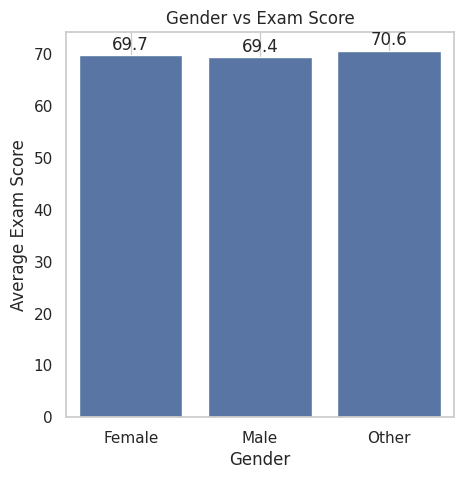

In [41]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='gender', y='exam_score', data=df, ci=None)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1,
            f'{height:.1f}', ha="center", fontsize=12)
plt.title('Gender vs Exam Score', fontsize=12)
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.grid()
plt.show()

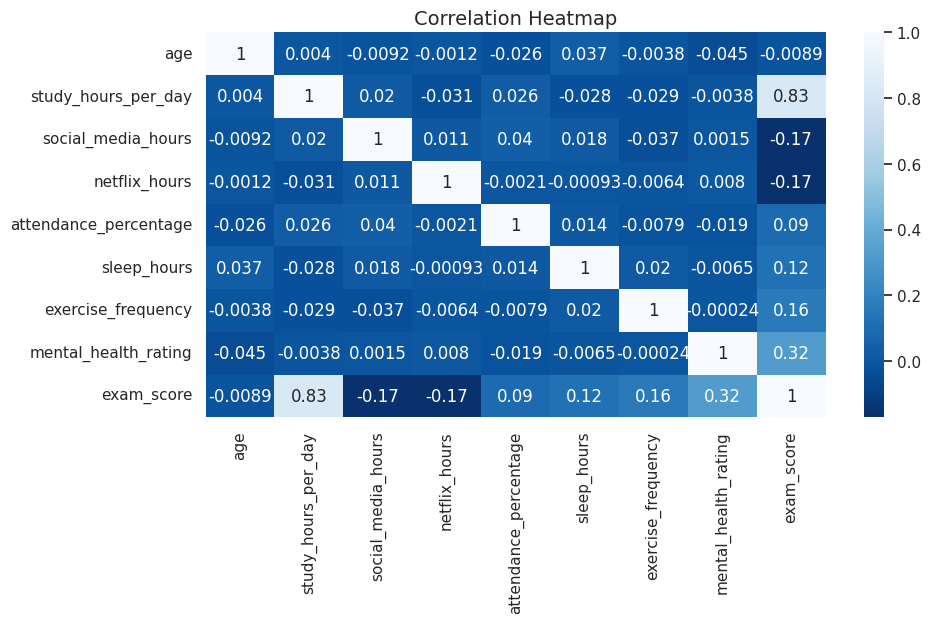

In [42]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues_r')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

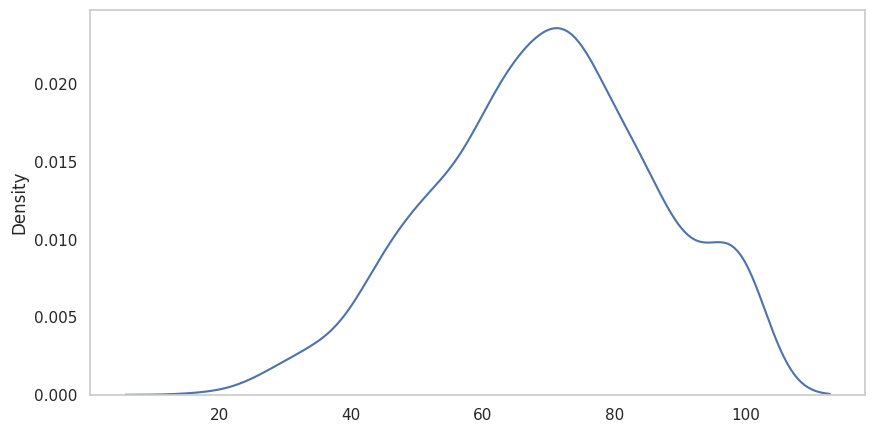

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(x=df['exam_score'], hist=False)
plt.grid()
plt.show()

## **Feature Selection & Categorization**

In [44]:
# Drop kolom student_id dan target
X = df.drop(['student_id', 'exam_score'], axis=1)
y = df['exam_score']

# Kolom kategorikal dan numerikal
categorical_cols = [
    'gender',
    'part_time_job',
    'diet_quality',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation'
]

numerical_cols = [
    'age',
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'sleep_hours',
    'exercise_frequency',
    'mental_health_rating'
]

## **Preprocessing & Split Data**

In [46]:
# Preprocessor: Standarisasi numerik + OneHot kategorikal
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [45]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Fit dan transform data training
X_train_transformed = preprocessor.fit_transform(X_train)

# Ambil nama fitur dari OneHotEncoder
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Gabungkan nama fitur numerik dan fitur hasil encoding
all_feature_names = numerical_cols + list(ohe_feature_names)

# Buat DataFrame dari hasil transformasi
X_train_processed_df = pd.DataFrame(X_train_transformed, columns=all_feature_names)

# Tampilkan 5 baris pertama
X_train_processed_df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,-0.210232,-1.049785,0.612601,1.813009,-0.176040,0.191900,1.456276,1.592488,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,0.658944,1.915186,1.469385,-0.293810,0.482898,-0.297797,-1.524587,0.188642,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.210232,-0.712857,-0.501219,-0.202209,0.993043,0.436749,0.462655,0.890565,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.658944,0.163158,0.955315,2.271013,1.673237,0.681598,-1.027777,0.539603,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,-0.644820,-0.038999,0.269887,-1.667822,0.822995,-2.174971,0.959465,-0.162320,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


## **Modelling**

In [49]:
# Model yang akan dibangun
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [50]:
# Simpan pipeline dan prediksi setiap model
trained_models = {}
predictions = {}

for name, model in models.items():
    # Pipeline: preprocessing + model
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])

    # Training
    pipe.fit(X_train, y_train)

    # Simpan pipeline & prediksi
    trained_models[name] = pipe
    predictions[name] = pipe.predict(X_test)

## **Evaluation**

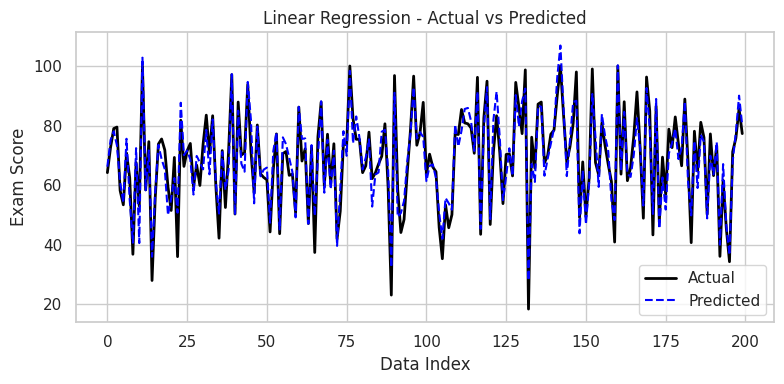

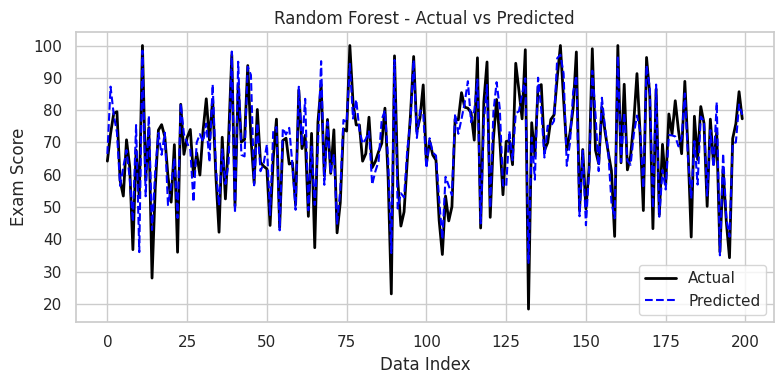

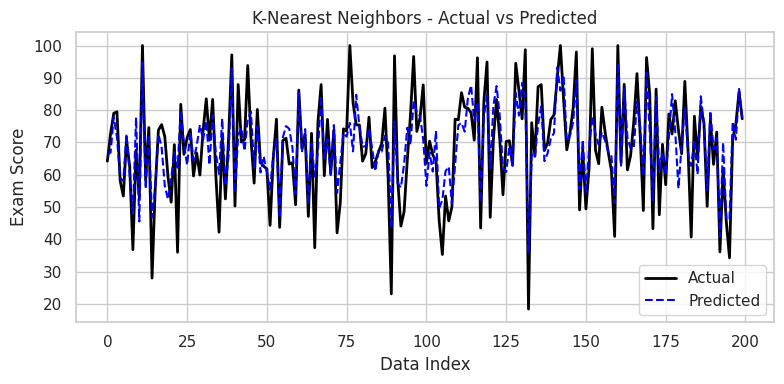

Perbandingan Evaluasi Model:
              Model  R2 Score       MSE      MAE
  Linear Regression  0.896531 26.532535 4.192343
      Random Forest  0.848949 38.733945 4.973955
K-Nearest Neighbors  0.708639 74.713558 6.778900


In [51]:
# Simpan skor evaluasi
results = []

for name, y_pred in predictions.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': r2,
        'MSE': mse,
        'MAE': mae
    })

    # Visualisasi
    plt.figure(figsize=(8, 4))
    plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
    plt.plot(y_pred, label='Predicted', color='blue', linestyle='dashed')
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Data Index")
    plt.ylabel("Exam Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Tampilkan hasil evaluasi
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("Perbandingan Evaluasi Model:")
print(results_df.to_string(index=False))

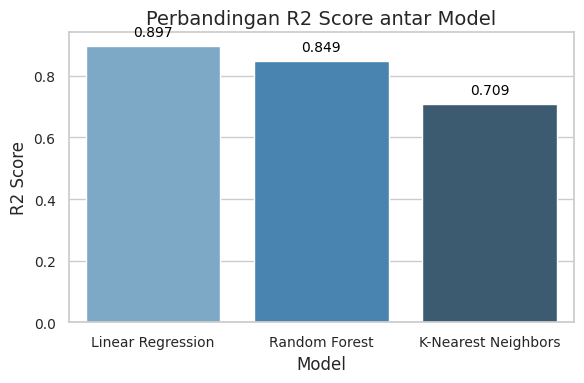

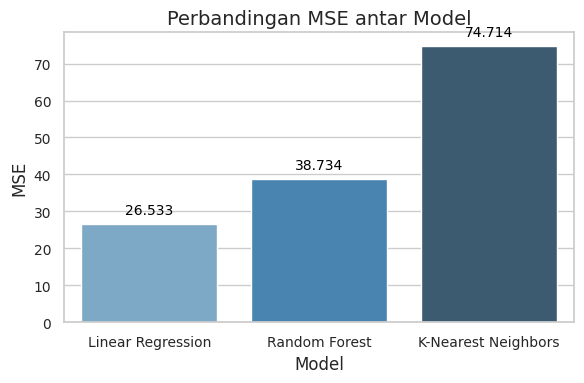

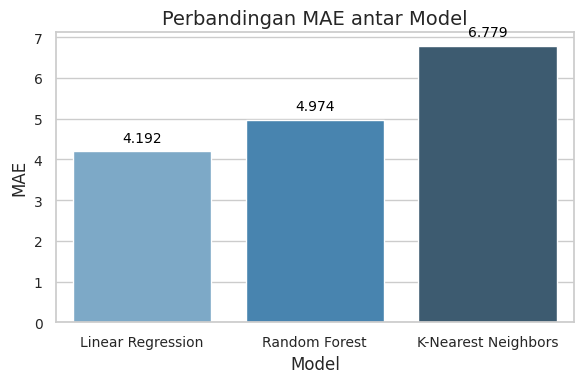

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style dan palet biru
sns.set(style="whitegrid")
blue_palette = sns.color_palette("Blues_d", n_colors=len(results_df))

# Plot per metrik dengan bar yang presisi dan warna biru
metrics = ['R2 Score', 'MSE', 'MAE']

for metric in metrics:
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(
        data=results_df,
        x='Model',
        y=metric,
        palette=blue_palette
    )

    # Tambahkan nilai di atas setiap batang
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.3f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            fontsize=10, color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

    plt.title(f'Perbandingan {metric} antar Model', fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel('Model', fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

**Insight:** <br>
Berdasarkan hasil evaluasi, model Linear Regression memberikan performa terbaik dibandingkan Random Forest dan K-Nearest Neighbors. Hal ini ditunjukkan oleh nilai R² Score yang paling tinggi (0.897) serta nilai MSE dan MAE yang paling rendah. Artinya, Linear Regression mampu membuat prediksi yang paling akurat dan stabil untuk dataset ini.

In [54]:
best_model = trained_models['Linear Regression']

# Mengambil koefisien regresi dan fitur dari pipeline
regressor = best_model.named_steps['regressor']
feature_names = preprocessor.get_feature_names_out()
coefficients = regressor.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                                      Feature  Coefficient
1                    num__study_hours_per_day    14.144790
7                   num__mental_health_rating     5.565088
6                     num__exercise_frequency     2.656671
5                            num__sleep_hours     2.421865
4                  num__attendance_percentage     1.349632
9                           cat__gender_Other     0.807281
10                     cat__part_time_job_Yes     0.374590
8                            cat__gender_Male     0.139663
0                                    num__age     0.113344
16                 cat__internet_quality_Poor    -0.019558
17     cat__extracurricular_participation_Yes    -0.113722
15                 cat__internet_quality_Good    -0.214797
13  cat__parental_education_level_High School    -0.527839
12                     cat__diet_quality_Poor    -0.549902
14       cat__parental_education_level_Master    -0.701798
11                     cat__diet_quality_Good    -0.9579

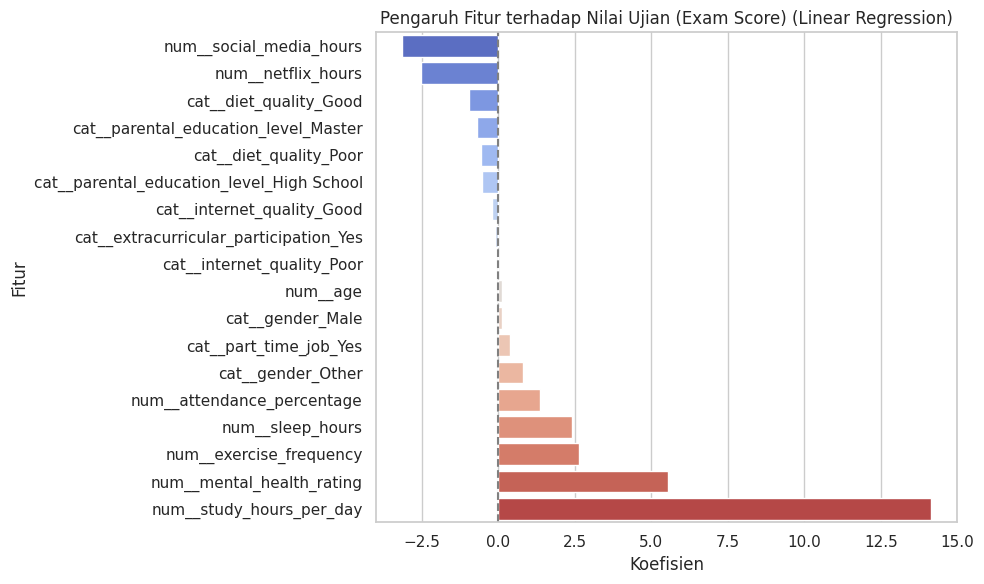

In [56]:
# Ambil pipeline model terbaik
best_model = trained_models['Linear Regression']

# Ambil koefisien dan nama fitur dari pipeline
regressor = best_model.named_steps['regressor']
feature_names = preprocessor.get_feature_names_out()
coefficients = regressor.coef_

# Buat DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=True)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Pengaruh Fitur terhadap Nilai Ujian (Exam Score) (Linear Regression)')
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()